In [81]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [82]:
nifty_data = pd.read_csv('./ml-project-data/NIFTY-50/2014.csv')
scaler = MinMaxScaler(feature_range=(0, 1))
nifty_data['Average'] = nifty_data.loc[: , "High":"Low"].mean(axis=1)
nifty = scaler.fit_transform(nifty_data[['Average', 'Shares Traded', 'Turnover (Rs. Cr)']])

In [83]:
tcs_data = pd.read_csv('./ml-project-data/TCS/01-01-2014-TO-31-12-2014TCSEQN.csv')
tcs = scaler.fit_transform(tcs_data[['Average Price', 'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty']])

In [84]:
infy_data = pd.read_csv('./ml-project-data/INFY/01-01-2014-TO-31-12-2014INFYEQN.csv')
infy = scaler.fit_transform(infy_data[['Average Price', 'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty']])

In [85]:
hcl_data = pd.read_csv('./ml-project-data/HCL/01-01-2014-TO-31-12-2014HCLTECHEQN.csv')
hcl = scaler.fit_transform(hcl_data[['Average Price', 'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty']])

In [86]:
techm_data = pd.read_csv('./ml-project-data/TECHM/01-01-2014-TO-31-12-2014TECHMEQN.csv')
techm = scaler.fit_transform(techm_data[['Average Price', 'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty']])

In [87]:
wipro_data = pd.read_csv('./ml-project-data/WIPRO/01-01-2014-TO-31-12-2014WIPROEQN.csv')
wipro = scaler.fit_transform(wipro_data[['Average Price', 'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty']])

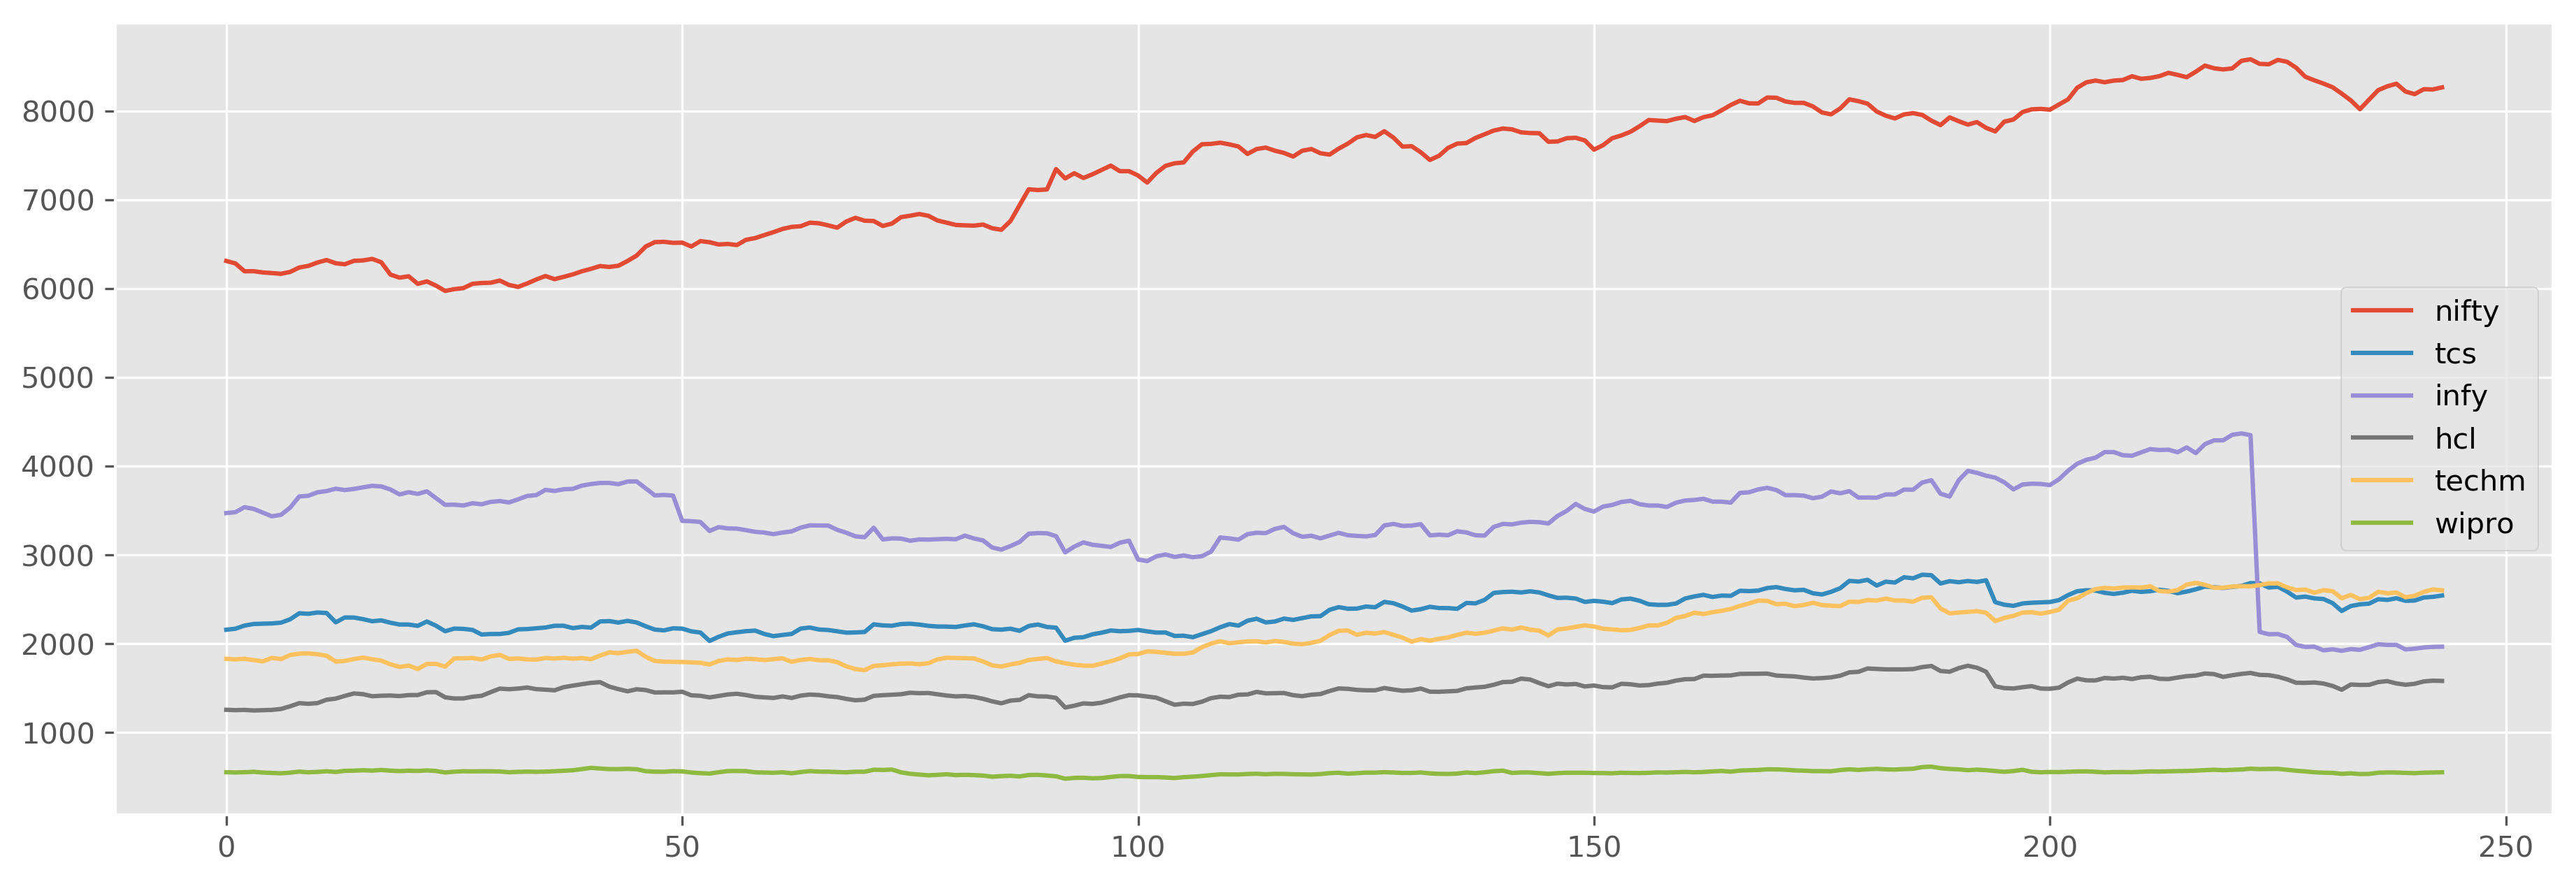

In [89]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 5), dpi=300)
plt.plot(nifty_data['Average'], label="nifty")
plt.plot(tcs_data['Average Price'], label="tcs")
plt.plot(infy_data['Average Price'], label="infy")
plt.plot(hcl_data['Average Price'], label="hcl")
plt.plot(techm_data['Average Price'], label="techm")
plt.plot(wipro_data['Average Price'], label="wipro")
plt.legend()
plt.show()